In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

%matplotlib inline

## Ford Gobike Data Exploration:


### By Mohamed Shawky Mohamed

## Preliminary Wrangling


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print(df.shape)

(183412, 16)


In [4]:
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df = df.dropna()

In [7]:
df.member_birth_year = df.member_birth_year.astype(int)

In [9]:
# change the data type for start and end time to be datetime64[ns], and seconds to minutes for a more accurate exploration,
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['start_time_dayofweek']= df['start_time'].dt.strftime('%a')
df['start_time_hour']= df['start_time'].dt.hour.index
df['end_hour'] = df['end_time'].dt.hour
df['duration_min'] = df['duration_sec']/60
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,end_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,0,8,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,2,5,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thu,3,4,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,4,0,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thu,5,0,29.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,Fri,183407,0,8.000000
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,Fri,183408,0,5.216667
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,Yes,Fri,183409,0,2.350000
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,Fri,183410,0,2.316667


In [10]:
# the start / end station will be useful for the exploration, so let's check on the data information,
df.start_station_name.duplicated().sum()

174623

In [11]:
(~df.start_station_name.duplicated()).sum()

329

* the above number are showing a lot of data as it has many uniuqe values.

In [12]:
#further exploration,,

print(len(df['start_station_name'].value_counts()))
df['start_station_name'].value_counts()

329


Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [13]:
print(len(df['end_station_name'].value_counts()))
df['end_station_name'].value_counts()

329


San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  5
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

* it seems that there are few stations with high number of bikers, so I'll cut them out of the data set for better investigations.

In [14]:
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)', 'Berry St at 4th St', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)']
df_top6 = df.loc[df['start_station_name'].isin(locs)]

In [15]:
df_top6['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Name: start_station_name, dtype: int64

In [16]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,end_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,0,8,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,2,5,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thu,3,4,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,4,0,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thu,5,0,29.883333


In [17]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_time_hour,end_hour,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,91617.270983,13.609533,11.733379
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,52990.690288,4.748029,27.370082
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000,1.016667
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,45733.750000,9.000000,5.383333
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,91793.500000,14.000000,8.500000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,137553.250000,18.000000,13.150000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,183411.000000,23.000000,1409.133333


#### What is the structure of your dataset?
* The dataset has 18000+ bike rides and the dataset contained the following details:

 * trip duration: how long the trip took in seconds
 * start time/end time: start/end date/time for the bike rides.
 * stations: start/end station, name, geolocation (latitude/longitude)
 * anonymized customer data: gender, birth date and user type

#### What are the main feature of interest in your dataset?
 * I am interested in investigating the duration of the biking trips.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 * start stations and end stations
 * user type,
 * age, 
 * gender will also have effects on trip duration.

#### Univariate Exploration


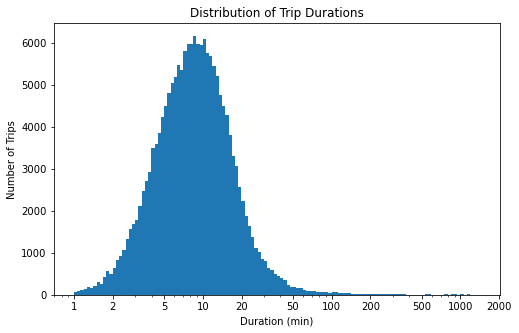

In [18]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration (min)');

* Trip duration is mostly centered on values which are less than 5 - 20 minutes with peak around 10 minutes. 

In [19]:
# Plotting age distribution derived from member's birth year.
df['member_birth_year'].describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

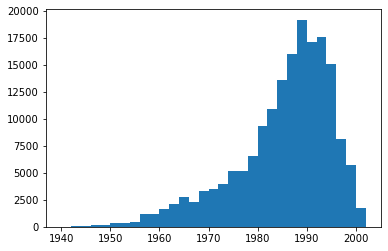

In [20]:
binsize = 2
bins = np.arange(1940, df['member_birth_year'].max()+binsize, binsize)
plt.hist(data = df, x = 'member_birth_year', bins = bins);

* Age  is mostly centered on values which are from DOB from 1980 to 1995 with peak around 1988 to 1992 DOB. 

In [21]:
# plotting types of users, and their genders,  
default_color = sb.color_palette()[0]

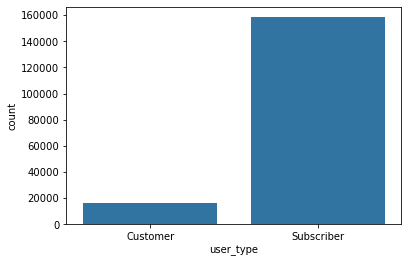

In [22]:
sb.countplot(data = df, x = 'user_type', color = default_color);

* most of the bikers are subscribers.

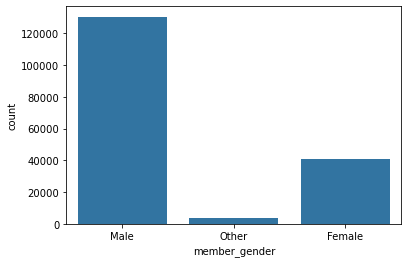

In [23]:
sb.countplot(data = df, x = 'member_gender', color = default_color);

* Most of the bikers are males. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The trip duration was unexpectedly are on values less than 5 - 20 minutes, with peak around 10 minutes. I just transformed the seconds to minutes so I can better investigate on my main variable of interest.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* Start / End stations has so many sub values or unnecessary data so that it can give a better insight regarding traffic of bikes at all of the stations, and I have adjusted the numbers so I can only include the main stations and to be able to include this variable in my exploartion with a simple and an accurate variable.

## Bivariate Exploration

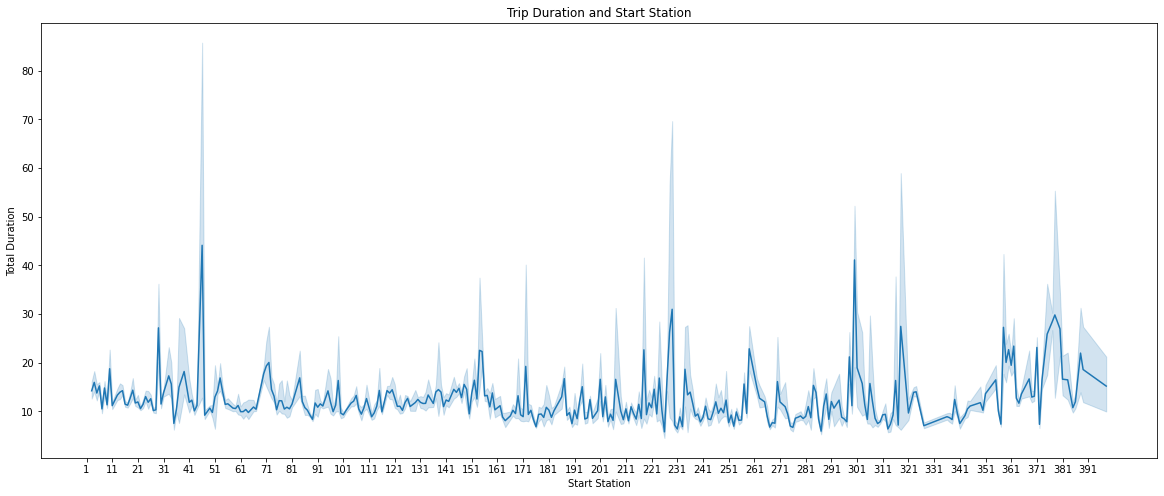

In [24]:
plt.figure(figsize = [20, 8])
sns.lineplot(data=df, x="start_station_id", y="duration_min")
plt.title('Trip Duration and Start Station')
plt.xticks(range(1, 401, 10))
plt.xlabel('Start Station')
plt.ylabel('Total Duration')
plt.show()

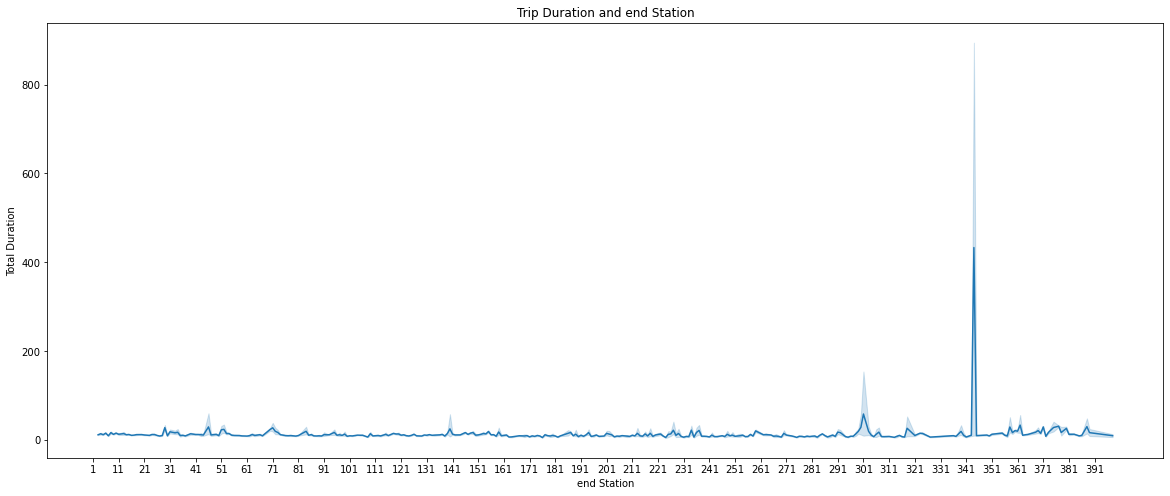

In [40]:
plt.figure(figsize = [20, 8])
sns.lineplot(data=df, x="end_station_id", y="duration_min")
plt.title('Trip Duration and end Station')
plt.xticks(range(1, 401, 10))
plt.xlabel('end Station')
plt.ylabel('Total Duration')
plt.show()

* the relationship between the trip duration in all of the Start / End stations looks the same as both are showing that every station has a unique value with some high values in few stations.

<AxesSubplot:xlabel='user_type', ylabel='count'>

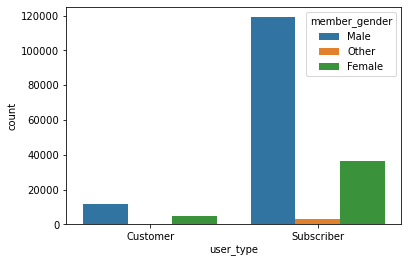

In [26]:
#the relation between the users types on their genders:
sb.countplot(data = df, x = 'user_type', hue = 'member_gender')

* it's showing that most of subscribers are males, and no "other" in gender were found on the customers type.

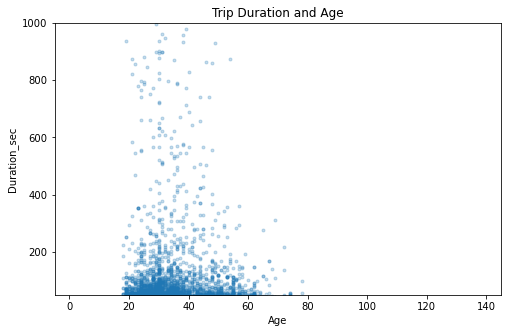

In [27]:
# the relation shp between the trip duration and age
plt.figure(figsize=[8,5])
plt.scatter((2019 - df['member_birth_year']), df['duration_min'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 50, 1000])
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Trip Duration is so dependable on the age of the member, when the age between 20 to 45, the trip duration is higher than the older ages.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


* Yes, the users types are and their genders are not affecting the main value of the population as both are high on the subscribers and the male gender.

## Multivariate Exploration


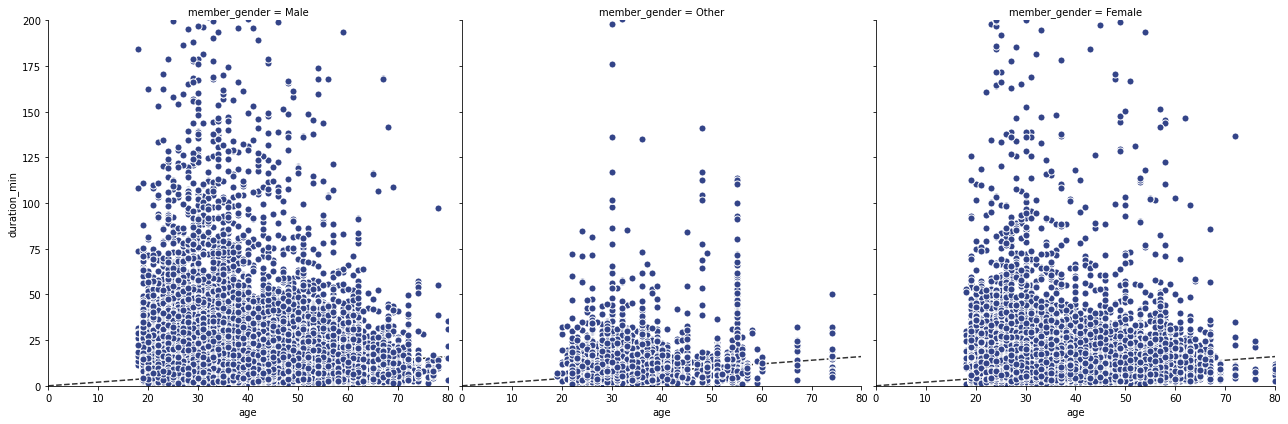

In [39]:
# Checking on the relationship of the users genders and age on the main variable of the trip duartion.
df['age'] = (2019 - df['member_birth_year'])

g = sns.FacetGrid(df, col="member_gender", margin_titles=True, height=6)
g.map(plt.scatter, "age", "duration_min", color="#334488", edgecolor="white", s=50, lw=1)
for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
g.set(xlim=(0, 80), ylim=(0, 200))
           

* The main thing I found is that the different users genders and ages has almost a similar relation with the trip duration, with more examples for Males and Females.


In [34]:
df_top6.start_time = pd.to_datetime(df_top6.start_time)
df_top6['start_time_hour']= df_top6['start_time'].dt.hour

<ipython-input-34-37b4d30eef65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top6['start_time_hour']= df_top6['start_time'].dt.hour


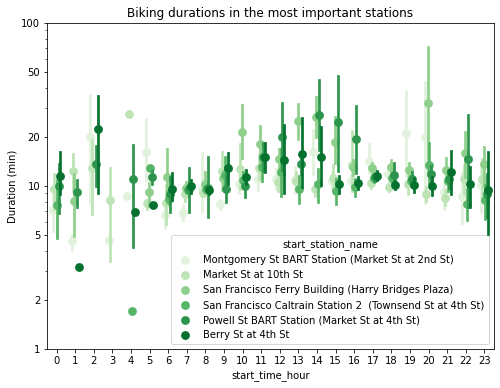

In [35]:
#Lets get the relation between the important start station and the start hour with the trip duration.
fig = plt.figure(figsize = [8,6]);

ax = sb.pointplot(data = df_top6, x = 'start_time_hour', y = 'duration_min', hue = 'start_station_name', 
                  palette = 'Greens', linestyles = '', dodge = 0.4);

plt.title('Biking durations in the most important stations');
plt.ylabel('Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

In [36]:
## I'll check now for the relationship between the trip duartion and the users ages above and under 40 years old on their genders and types.
age_flag1 = (df['age'] < 40)
age_below_forty = df.loc[age_flag1,:]

age_flag2 = (df['age'] >= 40)
age_above_forty = df.loc[age_flag2,:]

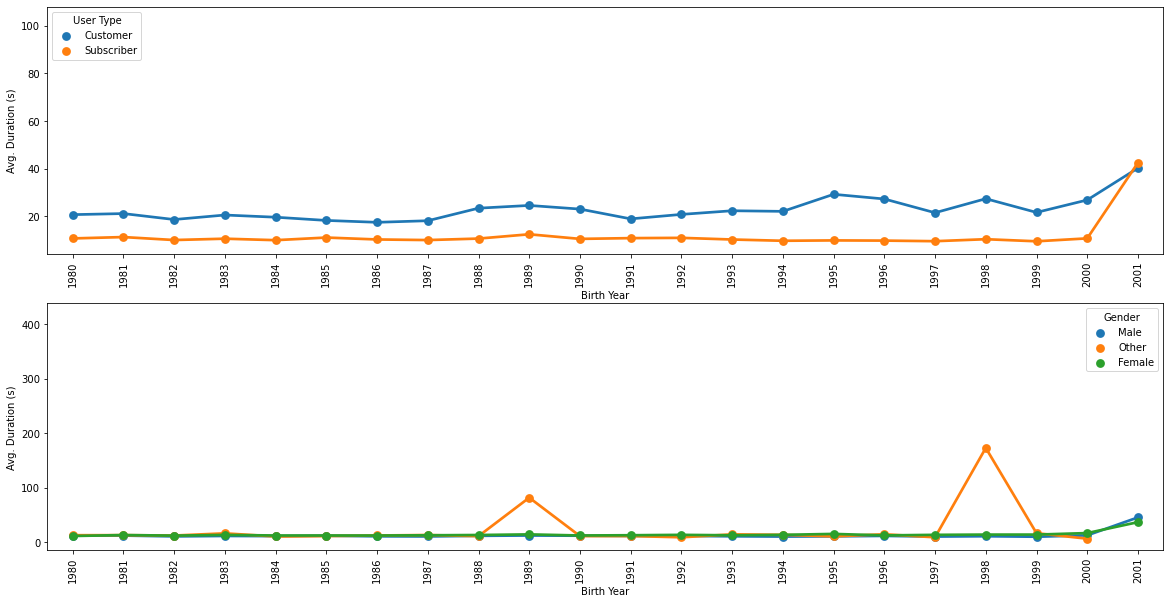

In [37]:
plt.figure(figsize=[20, 10])

# plot the point plot of the birth year vs. user type
plt.subplot(2, 1, 1)
sns.pointplot(data=age_below_forty, x='member_birth_year', y='duration_min', errwidth=0, hue='user_type')
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type')

# plot the point plot of the birth year vs. gender
plt.subplot(2, 1, 2)
sns.pointplot(data= age_below_forty, x='member_birth_year', y='duration_min', errwidth=0, hue='member_gender')
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='Gender');

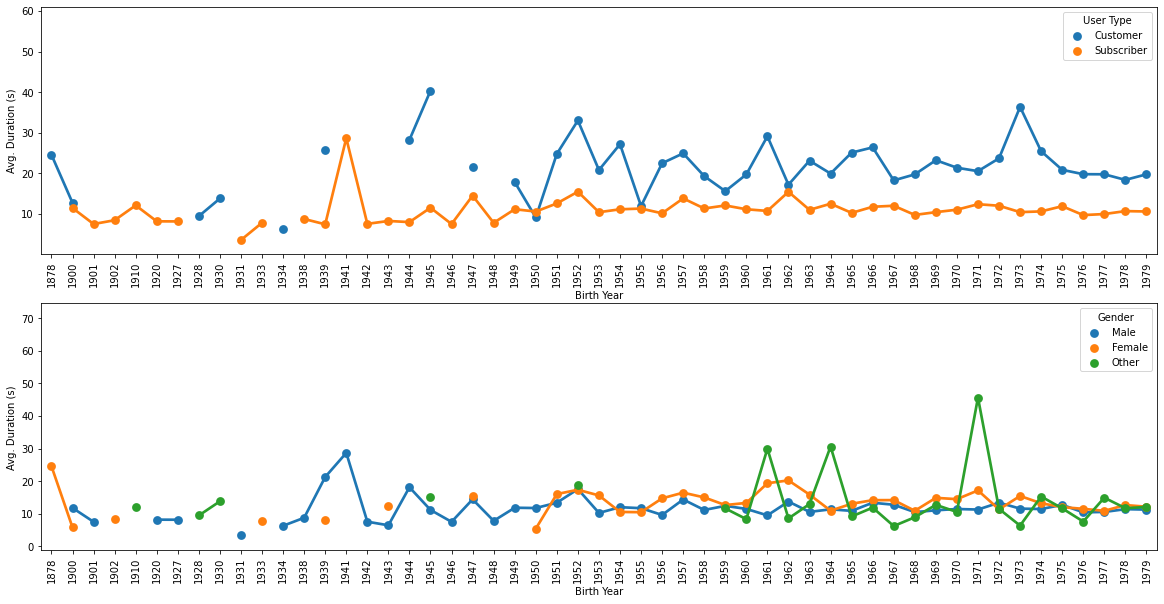

In [38]:
plt.figure(figsize=[20, 10])

# plot the point plot of the birth year vs. user type
plt.subplot(2, 1, 1)
sns.pointplot(data=age_above_forty, x='member_birth_year', y='duration_min', errwidth=0, hue='user_type')
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type')

# plot the point plot of the birth year vs. gender
plt.subplot(2, 1, 2)
sns.pointplot(data= age_above_forty, x='member_birth_year', y='duration_min', errwidth=0, hue='member_gender')
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='Gender');

* it's giving a clear indication that the age is the only affecting variable which is making a difference in the shape of the graph, while the gender distribution is almost similar when it comes to the Avg. duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


* Yes the main stations name and the trips starting hour, features that showed a very good indication for the usual trip duration .


### Were there any interesting or surprising interactions between features?


* Yes, the user type and the users genders are two features that has the same critria